In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("./AB_NYC_2019_clean.csv")

In [3]:
data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,...,day,neighbourhood_group_bronx,neighbourhood_group_brooklyn,neighbourhood_group_manhattan,neighbourhood_group_queens,neighbourhood_group_staten island,room_type_entire home/apt,room_type_private room,room_type_shared room,neighbourhood_group
0,0,2539,Clean & quiet apt home by the park,2,John,Kensington,0.250864,0.425895,0.173256,0.000000,...,0.600000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,82.0
1,1,2595,Skylit Midtown Castle,3,Jennifer,Midtown,0.575430,0.384270,0.261628,0.000000,...,0.666667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,96.0
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,12,Elisabeth,Harlem,0.744855,0.537153,0.174419,0.029851,...,0.533333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,74.0
3,4,5022,Entire Apt: Spacious Studio/Loft by central park,16,Laura,East Harlem,0.712713,0.529521,0.093023,0.134328,...,0.600000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,49.0
4,5,5099,Large Cozy 1 BR Apartment In Midtown East,19,Chris,Murray Hill,0.557234,0.416292,0.232558,0.029851,...,0.700000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,106.0


# Data Cleaning - For Ridge

In [4]:
X = data.drop(columns=['price','name','host_name','neighbourhood']).to_numpy()
y = data['price'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

nan_rows = np.any(np.isnan(X_test), axis=1)
X_test = X_test[~nan_rows]
y_test = y_test[~nan_rows]

nan_rows = np.any(np.isnan(X_train), axis=1)
X_train = X_train[~nan_rows]
y_train = y_train[~nan_rows]

# Ridge Regression for predicting listing prices

In [5]:
clf = Ridge(alpha=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"MSE for price prediction is: {mse}")

MSE for price prediction is: 0.009712095299299348


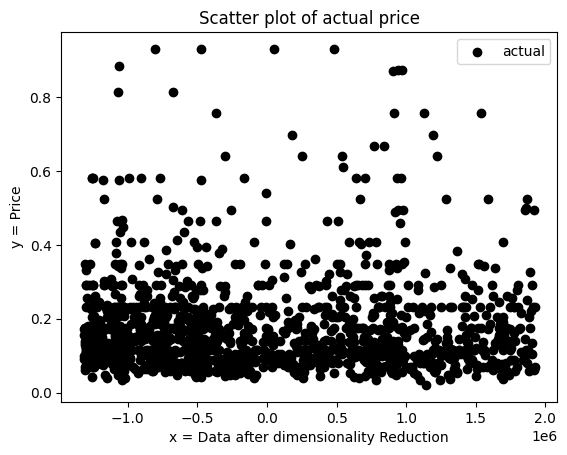

In [6]:
pca = PCA(n_components=1)
pca.fit(X_test)

X_test_transformed = pca.transform(X_test)

plt.scatter(X_test_transformed, y_test, color="black")
plt.title('Scatter plot of actual price')
plt.xlabel('x = Data after dimensionality Reduction')
plt.ylabel('y = Price')
plt.legend(["actual"])
plt.show()

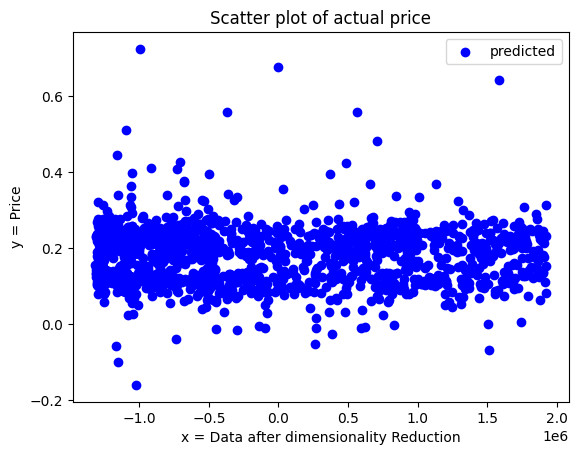

In [7]:
plt.scatter(X_test_transformed, y_pred, color="blue")
plt.title('Scatter plot of actual price')
plt.xlabel('x = Data after dimensionality Reduction')
plt.ylabel('y = Price')
plt.legend(["predicted"])
plt.show()


# K-Means Clustering for Recommendation


In [8]:
from sklearn.cluster import KMeans

# Features to cluster by include price/night, neighbourhood_group and room_type
X = data[['price', 'neighbourhood_group_bronx', 'neighbourhood_group_brooklyn', 'neighbourhood_group_manhattan','neighbourhood_group_queens','neighbourhood_group_staten island']]
y = data['id']

nan_rows = np.any(np.isnan(X), axis=1)
X = X[~nan_rows]
y = y[~nan_rows]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

inertia = []
for k in range(1,100):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)
  inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Error Rate')

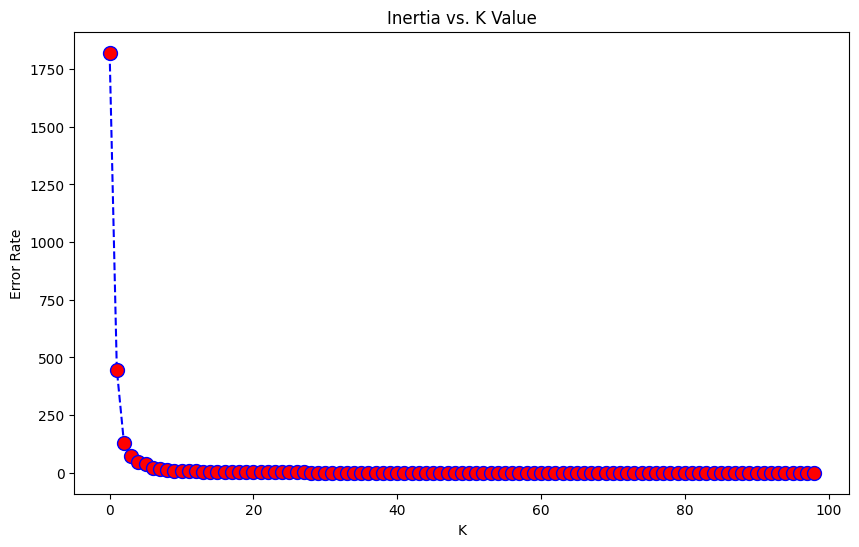

In [10]:
plt.figure(figsize=(10,6))
plt.plot(inertia,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Inertia vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X_train)

clusters_test = kmeans.predict(X_test)
cluster_assignments = kmeans.fit_predict(X_train)

rooms = dict()

for i in list(set(clusters_test)):
  cluster_indices = (cluster_assignments == i)
  cluster_rooms = y_train[cluster_indices]
  rooms[i] = cluster_rooms

In [12]:
rooms[0]

3209    2332880
3762    3067062
2392    1654561
2650    1907058
1006     533625
         ...   
3772    3079125
1130     619471
1294     726465
860      450009
3507    2722391
Name: id, Length: 1424, dtype: int64

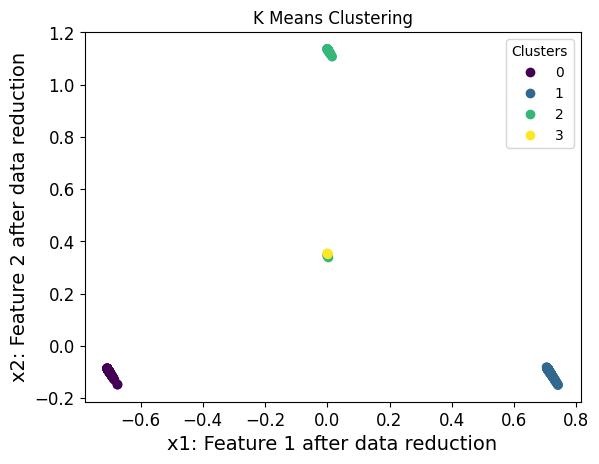

In [13]:
pca = PCA(n_components=2)
pca.fit(X_test)

X_test_transformed = pca.transform(X_test)

scatter = plt.scatter(x=X_test_transformed[:,0], y=X_test_transformed[:,1],
            c=clusters_test)
plt.xlabel(r'x1: Feature 1 after data reduction', fontsize=14)
plt.ylabel(r'x2: Feature 2 after data reduction', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
legend_labels = list(set(clusters_test))  # Assuming 'clusters' contains unique labels
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')
plt.title('K Means Clustering')
plt.show()

# Random Forest Trees for Predicting type of room

In [14]:
X = data.drop(columns=['room_type_entire home/apt','room_type_private room','room_type_shared room','name','host_name','neighbourhood']).to_numpy()
y = data[['room_type_entire home/apt','room_type_private room','room_type_shared room']].to_numpy()
y = np.argmax(y, axis=1)

In [15]:
nan_rows = np.any(np.isnan(X), axis=1)
X = X[~nan_rows]
y = y[~nan_rows]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [17]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_pred,y_test)

print(f"Accuracy of Random forests: {acc}")

Accuracy of Random forests: 0.8057275541795665


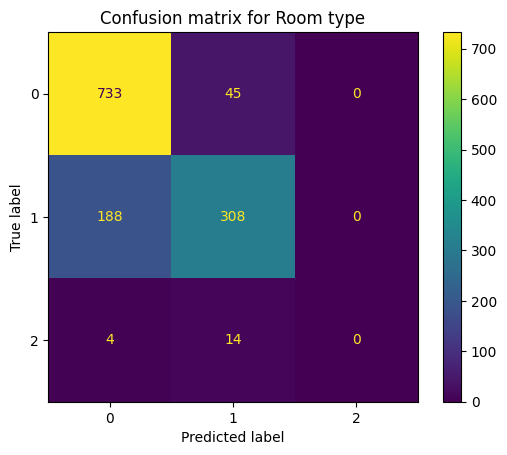

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

disp.plot()
plt.title('Confusion matrix for Room type')
plt.show()

# SVC for classifying the neighbourhood_groups



In [25]:
X = data.drop(columns=['latitude','longitude','neighbourhood_group_bronx','neighbourhood_group_brooklyn','neighbourhood_group_manhattan','neighbourhood_group_queens','neighbourhood_group_staten island','host_name','neighbourhood','neighbourhood_group','name']).to_numpy()
y = data[['neighbourhood_group_bronx','neighbourhood_group_brooklyn','neighbourhood_group_manhattan','neighbourhood_group_queens','neighbourhood_group_staten island']].to_numpy()

In [26]:
nan_rows = np.any(np.isnan(X), axis=1)
X = X[~nan_rows]
y = y[~nan_rows]

In [27]:
y = np.argmax(y, axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [29]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_pred,y_test)

print(f"Accuracy of SVC: {acc}")

Accuracy of SVC: 0.5681114551083591


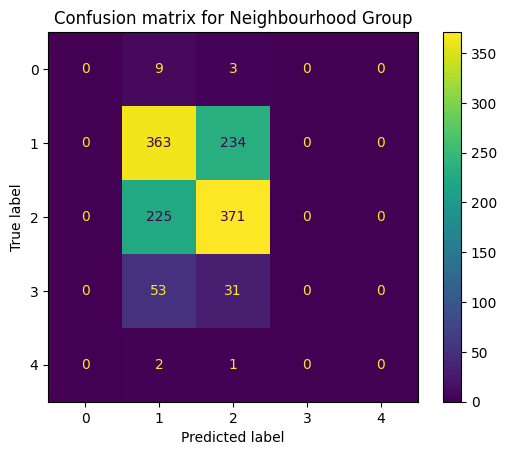

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

disp.plot()
plt.title('Confusion matrix for Neighbourhood Group')
plt.show()

# Lasso regression for popularity measure


In [31]:
X = data[['room_type_entire home/apt', 'room_type_private room', 'room_type_shared room',
            'neighbourhood_group_bronx', 'neighbourhood_group_brooklyn',
            'neighbourhood_group_manhattan', 'neighbourhood_group_queens',
            'neighbourhood_group_staten island', 'price', 'minimum_nights']]

Selected alpha: 0.01
Mean Squared Error: 0.012429424654040497


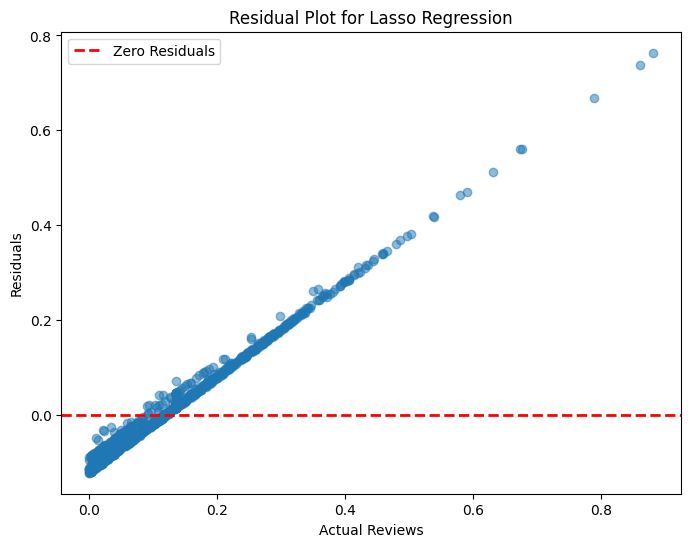

In [33]:
y_revie = data[['reviews_per_month']]
nan_rows = np.any(np.isnan(X), axis=1)
X = X[~nan_rows]
y_revie = y_revie[~nan_rows]
X_train, X_test, y_train, y_test = train_test_split(X, y_revie, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_reviews = LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5)
model_reviews.fit(X_train_scaled, y_train.values.ravel())
print("Selected alpha:", model_reviews.alpha_)

predicted_reviews = model_reviews.predict(X_test_scaled)
mse = mean_squared_error(y_test, predicted_reviews)
print("Mean Squared Error:", mse)
residuals = y_test.values.ravel() - predicted_reviews

plt.figure(figsize=(8, 6))
plt.scatter(y_test.values.ravel(), residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.title('Residual Plot for Lasso Regression')
plt.xlabel('Actual Reviews')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Linear regression for availability measure

In [35]:
y_available = data['availability_365']
y_available = y_available[~nan_rows]

X_train, X_test, y_train, y_test = train_test_split(X, y_available, test_size=0.33, random_state=42)

model_availability = LinearRegression()
model_availability.fit(X_train, y_train)

predicted_availability = model_availability.predict(X_test)

mse = mean_squared_error(y_test, predicted_availability)

print(f"MSE for availability prediction is: {mse}")

MSE for availability prediction is: 0.1358031449033927


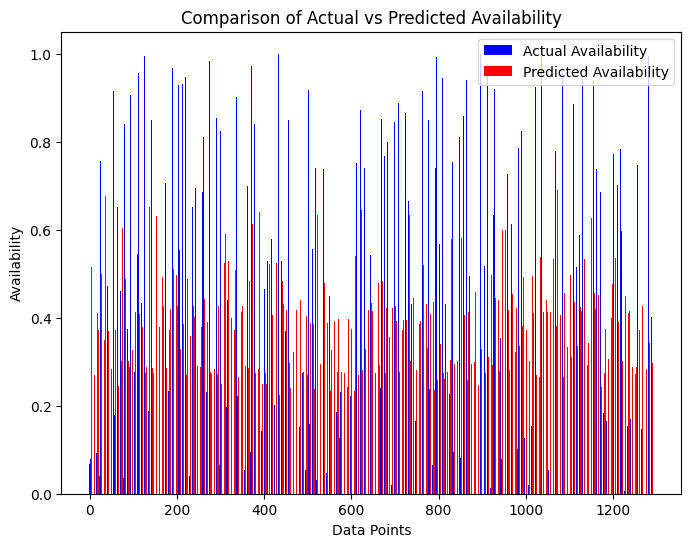

In [36]:
plt.figure(figsize=(8, 6))
indices = range(len(y_test))
bar_width = 0.4
plt.bar(indices, y_test.values, bar_width, label='Actual Availability', color='blue')
plt.bar([i + bar_width for i in indices], predicted_availability, bar_width, label='Predicted Availability', color='red')
plt.title('Comparison of Actual vs Predicted Availability')
plt.xlabel('Data Points')
plt.ylabel('Availability')
plt.legend()
plt.show()